In [1]:
import xarray as xr

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from scipy import stats

import math

# font size for plots
SMALL_SIZE = 8
BIGGER_SIZE = 12
plt.rc('font', size=  BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rcParams["font.family"] = "serif"

#

#=================================================================================




ymin =   0.
ymax =  80.
var = 'curv'
ylabel = "Curvature Acceleration"


ymin = -80.
ymax =  80.
var = 'tang'
ylabel = "Tangential Acceleration"

ymin =   0.
ymax =  80.
#speed
var = 'speed'
ylabel = "Translation Speed"


#=================================================================================
mon = '_JASO_'
monTitle = '[July-October]'
#=================================================================================




dom = '20_50'
titleString1 = '(b) Atlantic: 20-50N ' + monTitle
titleString2 = '(d) Atlantic: 20-50N ' + monTitle


dom = '0_90'
titleString1 = '(a) Entire Atlantic ' + monTitle 
titleString2 = '(c) Entire Atlantic ' + monTitle 


#=================================================================================


fileName = var+mon + "atl_"+dom+".nc"
output1 = "scatter_" + var+ mon + "atl_"+dom+".png"
output2 = "beta_" + var+ mon + "atl_"+dom+".png"
xlabelString = "Quantiles of Conditional " + ylabel

print(fileName)

speed_JASO_atl_0_90.nc


In [2]:
#open the data set
ds = xr.open_dataset(fileName)
print(ds)

<xarray.Dataset>
Dimensions:    (ncl0: 1, ncl1: 1, ncl2: 1, ncl3: 1, ncl5: 34146, ncl6: 34146, ncl7: 54, ncl8: 54, storm: 34146)
Dimensions without coordinates: ncl0, ncl1, ncl2, ncl3, ncl5, ncl6, ncl7, ncl8, storm
Data variables:
    startYear  (ncl0) int32 ...
    endYear    (ncl1) int32 ...
    latS       (ncl2) float32 ...
    latN       (ncl3) float32 ...
    Dates      (storm) datetime64[ns] ...
    Data       (ncl5) float64 ...
    Fracyear   (ncl6) float32 ...
    years      (ncl7) float32 ...
    yearly     (ncl8) float64 ...


In [3]:
# now lets read the yearly averaged data and establish some basic trend using OLS = this is the trend of the mean
#
yData  = ds.yearly
years  = ds.years
dfA = pd.DataFrame({'years':years, 'yData':yData, 'const':1})
reg1 = sm.OLS(endog=dfA['yData'], exog=dfA[['const', 'years']],missing='drop')
results = reg1.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  yData   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.5287
Date:                Thu, 03 Dec 2020   Prob (F-statistic):              0.470
Time:                        12:01:55   Log-Likelihood:                -123.39
No. Observations:                  54   AIC:                             250.8
Df Residuals:                      52   BIC:                             254.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.1096     42.150      1.236      0.2

In [4]:
#plt.plot(years, accel, color='grey',markersize=1)


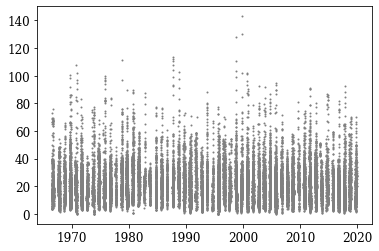

In [5]:

Data  = ds.Data
Time  = ds.Fracyear
plt.plot(Time, Data,'o', color='grey',markersize=1)


In [6]:
# Linear regression using numpy
slope, intercept, r_value, p_value, std_err = stats.linregress(Time.values,Data.values)
print("R-squared : %f" % r_value**2)
print ("slope    : %f" % slope)
print ("p value  : %f" % p_value)
print ("intercept  : %f" % intercept)


R-squared : 0.000438
slope    : -0.015832
p value  : 0.000109
intercept  : 52.790453


In [7]:
# Linear regression using numpy

# the time is in fractional year. What if we just assign all values to an integer year index?
#
xdat = [math.floor(float(i)) for i in Time.values]

slope, intercept, r_value, p_value, std_err = stats.linregress(xdat,Data.values)
print("R-squared : %f" % r_value**2)
print ("slope    : %f" % slope)
print ("p value  : %f" % p_value)
print ("intercept  : %f" % intercept)

#notes: the difference between the previous cell and this is small

R-squared : 0.000419
slope    : -0.015474
p value  : 0.000156
intercept  : 52.066442


In [8]:
# Now on to QR
#
# use the time and data to create a pandas dataframe

df = pd.DataFrame({'Time':Time, 'Data':Data})

#standardize the acceleration values
#df.iloc[:,1:2] = df.iloc[:,1:2].apply(lambda x: (x-x.mean())/ x.std()
#stddev = df.iloc[:,1].std()
#print(stddev)
#df.iloc[:,1] = (df.iloc[:,1]-df.iloc[:,1].mean())/df.iloc[:,1].std()

# we could convert fractional year to just year by using the xdat that was created using the floor function
# i.e. all points in a year (e.g. 2001) will be assigned the time = 2001.
#df = pd.DataFrame({'Time':xdat, 'Data':Data})

# Notes: I tested the outcome of keeping the fractional year versus the integer year (floor). The differences were minute
# so, either should be fine

#print(df.iloc[:,1].mean())
#print(df.iloc[:,1].std())



In [9]:
# A frst order polynomial fit to get the linear regression
poly = smf.ols(formula='Data ~ 1 +  Time', data=df).fit()
print (poly.summary())


                            OLS Regression Results                            
Dep. Variable:                   Data   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.97
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           0.000109
Time:                        12:01:55   Log-Likelihood:            -1.3403e+05
No. Observations:               34146   AIC:                         2.681e+05
Df Residuals:                   34144   BIC:                         2.681e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.7905      8.158      6.471      0.0

In [10]:

mod = smf.quantreg('Data ~ Time', df)


result = mod.fit(q=.30)
print(result.summary())
#print (dir(res))

print(result.pvalues['Time'])
print(result.params['Time'])

                         QuantReg Regression Results                          
Dep. Variable:                   Data   Pseudo R-squared:            5.732e-05
Model:                       QuantReg   Bandwidth:                       1.447
Method:                 Least Squares   Sparsity:                        27.76
Date:                Thu, 03 Dec 2020   No. Observations:                34146
Time:                        12:01:56   Df Residuals:                    34144
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.0101      8.601      3.257      0.001      11.153      44.868
Time          -0.0069      0.004     -1.606      0.108      -0.015       0.002

The condition number is large, 2.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.


In [11]:
#quantiles = np.arange(.05,.96, .05)

quantiles = [0.05,.10,.15,.2,.3,.5,.7,.8,.85,.90,.95]


def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'],res.params['Time'], res.pvalues['Time']] + \
            res.conf_int().loc['Time'].tolist()
   
        
models = [fit_model(x1) for x1 in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'p', 'lb', 'ub'])
np.savetxt(r'np.txt', models[["q","b","p","lb","ub"]], fmt='%1.2f & %1.3f & %1.3f &  [ %1.3f, %1.3f ] \\')


In [12]:
quantiles = np.arange(.05,.96, .05)

#quantiles = [0.05,.10,.15,.2,.5,.7,.8,.85,.90,.95]


def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'],res.params['Time'], res.pvalues['Time']] + \
            res.conf_int().loc['Time'].tolist()
   
        
models = [fit_model(x1) for x1 in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'p', 'lb', 'ub'])

print(models.round(4))


/home/anant/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


       q         a       b       p      lb      ub
0   0.05   37.3983 -0.0159  0.0000 -0.0230 -0.0088
1   0.10   31.4745 -0.0119  0.0030 -0.0197 -0.0040
2   0.15   21.1702 -0.0057  0.1588 -0.0137  0.0022
3   0.20   22.2151 -0.0055  0.1968 -0.0138  0.0028
4   0.25   29.7211 -0.0085  0.0426 -0.0167 -0.0003
5   0.30   28.0101 -0.0069  0.1083 -0.0154  0.0015
6   0.35   35.3868 -0.0099  0.0230 -0.0185 -0.0014
7   0.40   37.5673 -0.0104  0.0145 -0.0187 -0.0021
8   0.45   32.4386 -0.0072  0.0741 -0.0150  0.0007
9   0.50   35.2887 -0.0080  0.0533 -0.0161  0.0001
10  0.55   39.7827 -0.0096  0.0285 -0.0182 -0.0010
11  0.60   45.8739 -0.0120  0.0107 -0.0212 -0.0028
12  0.65   46.7291 -0.0116  0.0231 -0.0216 -0.0016
13  0.70   50.0752 -0.0124  0.0197 -0.0229 -0.0020
14  0.75   47.3962 -0.0102  0.0670 -0.0211  0.0007
15  0.80   63.5594 -0.0172  0.0056 -0.0293 -0.0050
16  0.85  113.8103 -0.0410  0.0000 -0.0540 -0.0281
17  0.90  112.2119 -0.0385  0.0000 -0.0545 -0.0224
18  0.95   52.0054 -0.0046  0.7

In [13]:
# Least square estimate of the trend of the mean

ols = smf.ols(formula='Data ~ Time', data=df).fit()
ols_ci = ols.conf_int().loc['Time'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['Time'],
           lb = ols_ci[0],
           ub = ols_ci[1],
           p=ols.pvalues['Time'])
print(ols)


{'a': 52.79045467055036, 'b': -0.015832025571748364, 'lb': -0.023851013863338738, 'ub': -0.00781303728015799, 'p': 0.00010915945123627621}


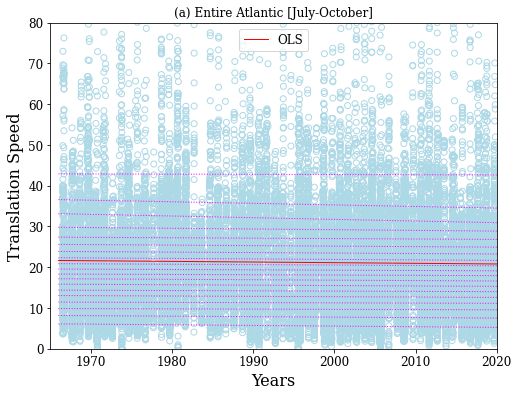

In [14]:
#x = np.arange(df.years.min(), df.years.max(), 50)

x = np.arange(1966,2021,1)

get_y = lambda a, b: a + b * x

n = 9
colors = pl.cm.jet(np.linspace(0,1,n))

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', linewidth=1, color='magenta')    
    
y = get_y(ols['a'], ols['b'])



ecolor = "lightblue"
ax.scatter(df.Time, df.Data, facecolors='none', edgecolors=ecolor) #, s=2 ,alpha=.7)
ax.plot(x, y, color='red', linewidth=1, label='OLS')
ax.set_xlim((1965,2020))
ax.set_ylim((ymin,ymax))
legend = ax.legend()
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel(ylabel, fontsize=16);
plt.title(titleString1)

plt.savefig(output1)


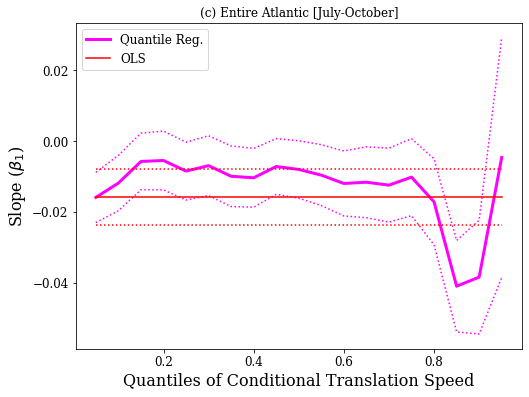

In [15]:
n = models.shape[0]
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(models.q, models.b,     color='magenta', linewidth=3, label='Quantile Reg.')
ax.plot(models.q, models.ub, linestyle='dotted', color='magenta')
ax.plot(models.q, models.lb, linestyle='dotted', color='magenta')

ax.plot(models.q, [ols['b']] * n, color='red', label='OLS')
ax.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
ax.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
legend = ax.legend()
ax.set_xlabel(xlabelString, fontsize=16)
ax.set_ylabel('Slope (' + r'$\beta_1$' +')', fontsize=16);
plt.title(titleString2)

plt.savefig(output2)


In [16]:
inter = 367.7540
slope = -0.1639

ydat = inter + slope*2019
print (ydat)

36.83990000000006
